In [2]:
##in class of 23 people, what is the probability of atleat two people havve same birthday

prob = 1.0
classSize = 23
for i in range(classSize):
    prob = prob * (365-i)/365
print("probability of no shared birthdays = ", prob)
print("probability of 2 shared birthdays = ", 1-prob)

probability of no shared birthdays =  0.49270276567601445
probability of 2 shared birthdays =  0.5072972343239855


In [10]:
#Google decides to do random drug tests for heroin on their employees.
#They know that 3% of their population uses heroin. The drug test has the following accuracy:
#The test correctly identifies 95% of
#the heroin users (sensitivity) and 90% of the non-users (specificity).

def prob_of_drug(puser,specificity ,sensitivity ):
    prob=(specificity*puser)/((specificity*puser)+(sensitivity*(1-puser)))
    return prob   

In [11]:
prob_of_drug(0.003, 0.95,0.1)

0.027791321306679665

Text(0,0.5,'Probability')

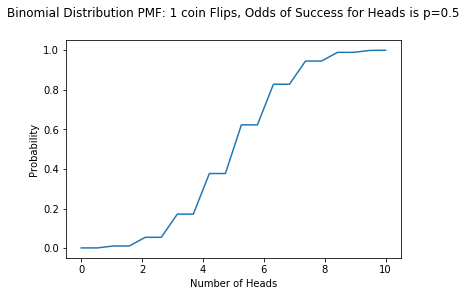

In [85]:
#bernoli = Binomial distribution  n=1
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
from scipy.stats import poisson

n=10
p=0.5
cdf=binom.cdf
x =np.linspace(0,10,20)
%matplotlib inline

plt.plot(x,cdf(x,n,p))
#Title (use y=1.08 to raise the long title a little more above the plot)
plt.title('Binomial Distribution PMF: 1 coin Flips, Odds of Success for Heads is p=0.5',y=1.08)
plt.xlabel('Number of Heads')
plt.ylabel('Probability')


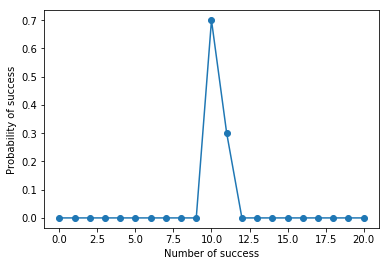

In [58]:
#bernoli distribution:What is the probability of getting 2 heads out of 10 flips of a fair coin? 
#In this experiment the probability of getting a head is 0.3,
#this means that on an average you can expect 3 coin flips to be heads. 
#I define all the possible values the coin flip can take, k = np.arange(0,21)
from scipy.stats import bernoulli
import numpy
n=10
p=0.3
k=np.arange(0,21)
bernoulli=bernoulli.pmf(k,p,n)
plt.plot(k,bernoulli,'o-')
plt.xlabel('Number of success')
plt.ylabel('Probability of success')
plt.show()


Text(0,0.5,'probability of success')

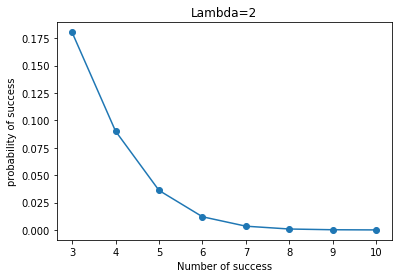

In [69]:
# poisson distribution
# A random variable X that has a Poisson distribution
# represents the number of events occurring in a fixed time interval with a rate parameters λ.
# λ tells you the rate at which the number of events occur.  The average and variance is λ.
rate=2
n=np.arange(3,11)
y=poisson.pmf(n, rate)
plt.plot(n,y,'o-')
plt.title('Lambda=2')
plt.xlabel('Number of success')
plt.ylabel('probability of success')

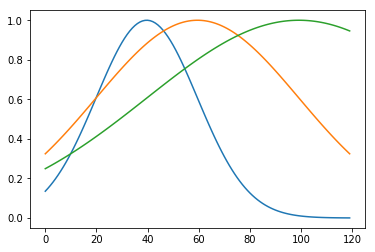

In [78]:
#guassian distribution for 3 mu and sigma 
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

for mu, sig in [(-1, 1), (0, 2), (2, 3)]:
    plt.plot(gaussian(np.linspace(-3, 3, 120), mu, sig))



plt.show()

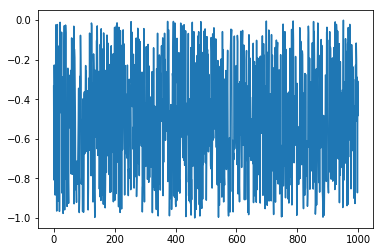

In [82]:
##unifor distribution   f(x)=1/a-b
import matplotlib.pyplot as plt
s=np.random.uniform(-1,0,1000)
#count, bins, ignored = plt.hist(s, 15, normed=True)
#plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.plot(s)
plt.show()


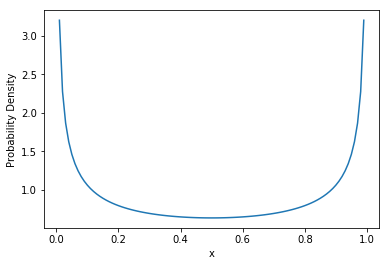

In [87]:
# ##beta distribution
# The beta distribution is a continuous distribution which can take values between 0 and 1.
# This distribution is parameterized by two shape parameters α and β.
#
from scipy.stats import beta
a=0.5
b=0.5
x=np.arange(0.01,1,0.01)
y=beta.pdf(x,a,b)
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.show()